# Introduction to Linear Regression

We will be using [statsmodels](http://statsmodels.sourceforge.net/devel/examples/notebooks/generated/ols.html) for learning about linear regression. It covers the models better than in scikit when we are learning and want more insights into the model parameters. But we will mainly be using scikit learn for the rest of the course. 

In [1]:
# Import the libraries required
import pandas as pd
import statsmodels.formula.api as smf
import matplotlib.pyplot as plt

# this allows plots to appear directly in the notebook
%matplotlib inline

In [2]:
# Read in data
house_data = pd.read_csv("chicagohouseprices2.csv", )

In [3]:
# Summarise the data
house_data.describe()

,Unnamed: 0,Price,Bath,CrimeIndex,MinutesToLoop,MilesToLake,Age,LotSizeSqft,HouseSizeSqft,SchoolIndex,EstimatedPrice
count,219.000000,219.000000,70.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000
mean,109.000000,483431.050228,2.271429,4.663607,9.698630,3.420411,29.424658,873.200913,699.977169,49.197717,486219.119635
std,63.364028,400124.919077,0.883364,1.418146,2.898995,0.352522,49.155880,1392.893683,1175.278922,18.554525,397858.185948
min,0.000000,24500.000000,1.000000,1.090000,6.000000,2.770000,0.000000,0.000000,0.000000,16.700000,28836.500000
25%,54.500000,319000.000000,2.000000,3.940000,8.000000,3.150000,0.000000,0.000000,0.000000,36.100000,307448.750000
50%,109.000000,390000.000000,2.000000,4.930000,9.000000,3.400000,0.000000,0.000000,0.000000,50.000000,391980.000000
75%,163.500000,512500.000000,3.000000,5.580000,10.000000,3.685000,41.000000,2614.000000,1344.000000,59.500000,532475.000000
max,218.000000,3686000.000000,4.000000,8.080000,22.000000,4.200000,131.000000,7405.000000,6422.000000,93.900000,3973508.000000


In [4]:
# Remove the first column that's an index
house_data = house_data.drop('Unnamed: 0', 1)

In [5]:
# Look for any linear correlations in the data
house_data.corr()

,Price,Bath,CrimeIndex,MinutesToLoop,MilesToLake,Age,LotSizeSqft,HouseSizeSqft,SchoolIndex,EstimatedPrice
Price,1.000000,0.113943,0.118667,-0.034644,-0.072433,0.237720,0.443341,0.456272,-0.072403,0.983784
Bath,0.113943,1.000000,0.163785,0.166330,-0.157517,-0.039220,-0.029979,0.698526,-0.047992,0.105632
CrimeIndex,0.118667,0.163785,1.000000,0.194745,0.102382,-0.036644,-0.008807,0.070952,-0.100256,0.122793
MinutesToLoop,-0.034644,0.166330,0.194745,1.000000,0.374829,-0.023820,-0.053292,-0.032437,-0.196728,-0.034185
MilesToLake,-0.072433,-0.157517,0.102382,0.374829,1.000000,-0.047087,0.006240,-0.046517,-0.205966,-0.082604
Age,0.237720,-0.039220,-0.036644,-0.023820,-0.047087,1.000000,0.716774,0.645147,-0.029953,0.255628
LotSizeSqft,0.443341,-0.029979,-0.008807,-0.053292,0.006240,0.716774,1.000000,0.828598,-0.055458,0.454939
HouseSizeSqft,0.456272,0.698526,0.070952,-0.032437,-0.046517,0.645147,0.828598,1.000000,-0.023378,0.471783
SchoolIndex,-0.072403,-0.047992,-0.100256,-0.196728,-0.205966,-0.029953,-0.055458,-0.023378,1.000000,-0.073825
EstimatedPrice,0.983784,0.105632,0.122793,-0.034185,-0.082604,0.255628,0.454939,0.471783,-0.073825,1.000000


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x11664d650>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x120e95c50>]], dtype=object)

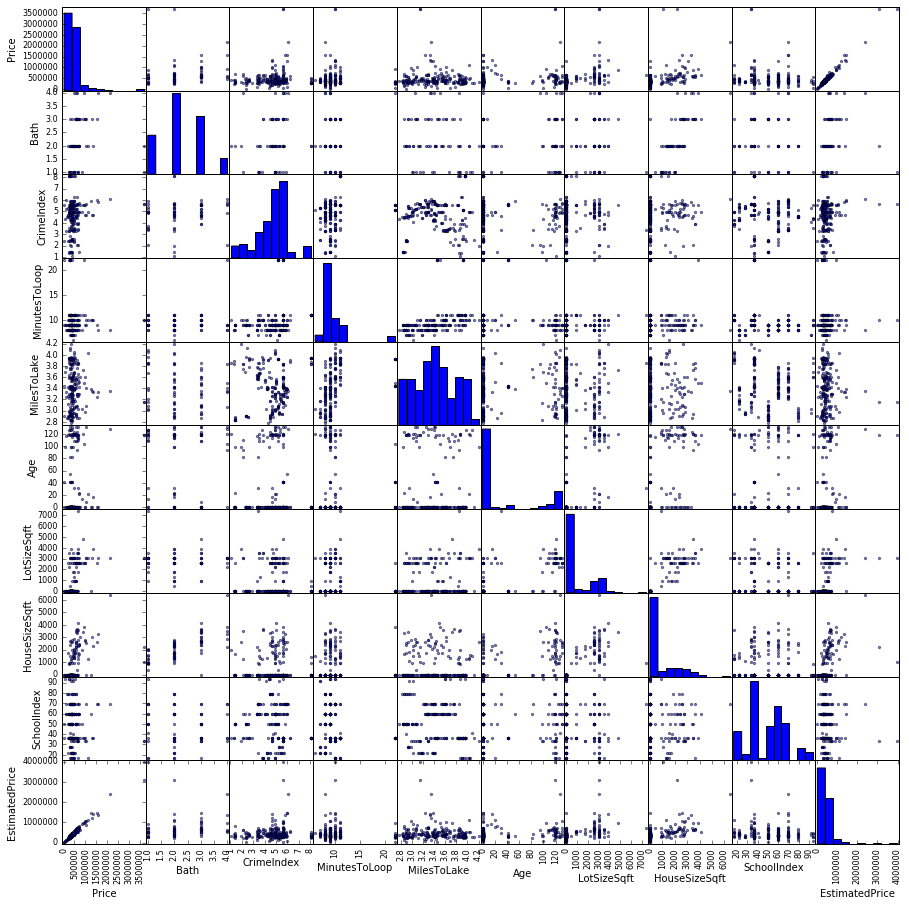

In [6]:
# Plot the data
pd.scatter_matrix(house_data, figsize=(15,15))

### Questions?

- Can you describe the data set - give a summary of what's happening?
- What looks to be affecting house prices from our initial inspection?
- What is the type of relationship in those variables affecting price?

In [34]:
# create a fitted model in one line
lm = smf.ols(formula= 'Price ~ (Age^2)', data=house_data).fit()

# print the coefficients
lm.params

Intercept    422995.474368
Age ^ 2        1967.795289
dtype: float64

In [8]:
# What would you expect a house price to be for a house with 3 bathrooms and 350 sqft?
# Calculate it.
508310 -28995.66*3 + 133*350

467873.02

In [35]:
lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Price   R-squared:                       0.056
Model:                            OLS   Adj. R-squared:                  0.052
Method:                 Least Squares   F-statistic:                     12.85
Date:                Mon, 04 Apr 2016   Prob (F-statistic):           0.000417
Time:                        20:41:52   Log-Likelihood:                -3128.9
No. Observations:                 219   AIC:                             6262.
Df Residuals:                     217   BIC:                             6269.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
Intercept    4.23e+05   3.13e+04     13.528      0.000      3.61e+05  4.85e+05
Age ^ 2     1967.7953    549.004      3.584      0.000       885.732  3049.859
==============================================================================
Omnibus:                      259.233   Durbin-Watson:                   1.563
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            11039.385
Skew:                           4.978   Prob(JB):                         0.00
Kurtosis:                      36.327   Cond. No.                         67.6
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [41]:
# Let's try just the estimated price
# create a fitted model in one line
lm = smf.ols(formula='Price ~ (Price^2)+(Age^2)', data=house_data).fit()

# print the coefficients
lm.params

Intercept   -2.000000e+00
Price ^ 2    1.000000e+00
Age ^ 2      2.501110e-12
dtype: float64

In [42]:
lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Price   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                  1.000
Method:                 Least Squares   F-statistic:                 4.549e+32
Date:                Mon, 04 Apr 2016   Prob (F-statistic):               0.00
Time:                        20:56:15   Log-Likelihood:                 4586.2
No. Observations:                 219   AIC:                            -9166.
Df Residuals:                     216   BIC:                            -9156.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
Intercept     -2.0000   2.13e-11  -9.37e+10      0.000        -2.000    -2.000
Price ^ 2      1.0000   3.41e-17   2.93e+16      0.000         1.000     1.000
Age ^ 2     2.501e-12   2.84e-13      8.807      0.000      1.94e-12  3.06e-12
==============================================================================
Omnibus:                      228.944   Durbin-Watson:                   1.292
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             6473.090
Skew:                          -4.215   Prob(JB):                         0.00
Kurtosis:                      28.265   Cond. No.                     1.01e+06
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.01e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [43]:
# create a DataFrame with the minimum and maximum values of EstimatedPrice
X_new = pd.DataFrame({'Age': [house_data.Age.min(), house_data.Age.max()]})
X_new.head()

,Age
0,0
1,131


In [45]:
preds = lm.predict(X_new)
preds

NameError: name 'Price' is not defined

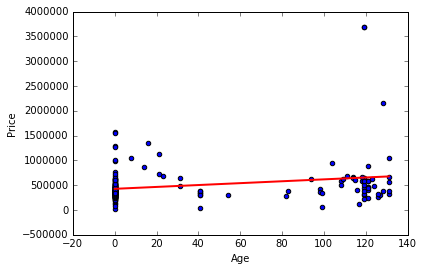

In [40]:
# first, plot the observed data
house_data.plot(kind='scatter', x='Age', y='Price')

# then, plot the least squares line
plt.plot(X_new, preds, c='red', linewidth=2)

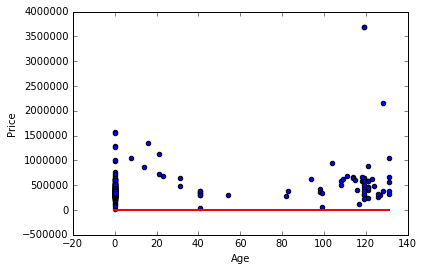

In [31]:
# Try selecting different variables or combinations of variables. Can you get a better fit?
lm = smf.ols(formula='Age ~ (Price*Price)', data=house_data).fit()
preds = lm.predict(house_data)
house_data.plot(kind='scatter', x='Age', y='Price')
plt.plot(house_data.Age, preds, c='red', linewidth=2)